# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [8]:
# Libraries
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

loc --> mean
<br>
scale --> std
<br>
size --> sample size

In [71]:
pop1 = pd.Series(stats.norm.rvs(loc=50,scale=5,size=10))
pop2 = pd.Series(stats.norm.rvs(loc=50,scale=5,size=50))
pop3 = pd.Series(stats.norm.rvs(loc=50,scale=5,size=500))
pop4 = pd.Series(stats.norm.rvs(loc=50,scale=5,size=5000))

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

Text(0.5, 1.0, 'n=5000')

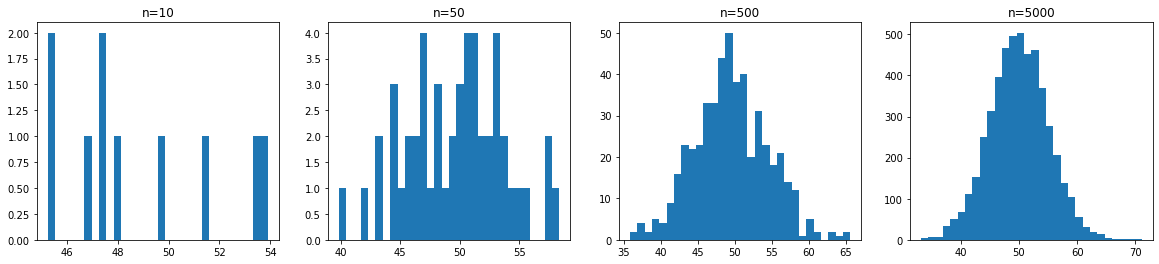

In [72]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))
ax1.hist(pop1,bins=30)
ax1.set_title("n=10")
ax2.hist(pop2,bins=30)
ax2.set_title("n=50")
ax3.hist(pop3,bins=30)
ax3.set_title("n=500")
ax4.hist(pop4,bins=30)
ax4.set_title("n=5000")

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
"""
The larger the random sample size (in a population of mean μ and standard deviation) you take (with replacement),
the more that its distribution is going to ressemble a normal distribution.
"""

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [ ]:
#plots above

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [34]:
p=0.15
n=5
dist = stats.binom(n,p)
dist

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

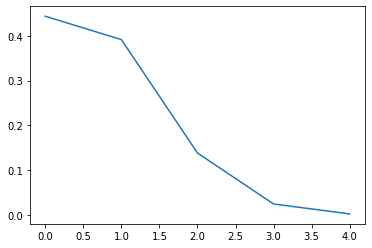

In [35]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

In [ ]:
"""
What we can see is that the probability decreases as the sample increases. 
The liklihood of one participant over 1 clicking the advert is higher than all 5 of them do.
"""

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

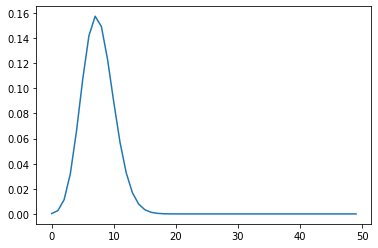

In [44]:
# 50 participants

n=50

dist = stats.binom(n,p)

x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

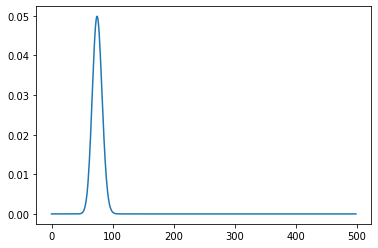

In [43]:
# 500 participants

n=500

dist = stats.binom(n,p)

x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

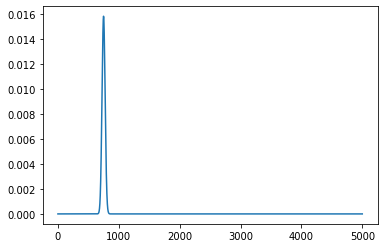

In [42]:
# 5000 participants

n=5000

dist = stats.binom(n,p)

x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

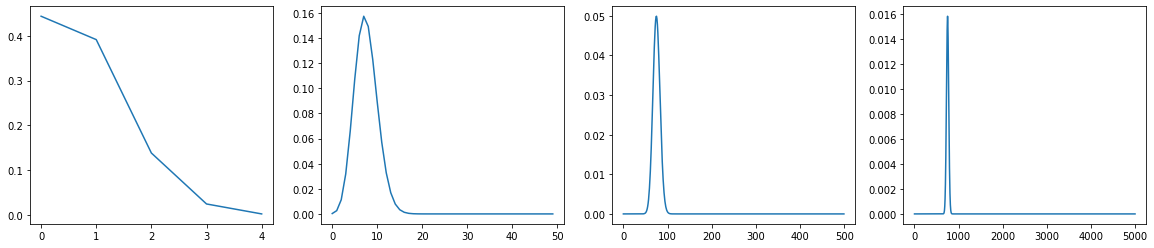

In [54]:
#all together to visualise better

p=0.15
n=5
n50=50
n500=500
n5000=5000

dist = stats.binom(n,p)

x = range(n)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,4))

ax1.plot(range(n), stats.binom(n,p).pmf(range(n)))
ax2.plot(range(n50), stats.binom(n50,p).pmf(range(n50)))
ax3.plot(range(n500), stats.binom(n500,p).pmf(range(n500)))
ax4.plot(range(n5000), stats.binom(n5000,p).pmf(range(n5000)))

plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [65]:
samples = [5,50,500,5000]
dist = [stats.binom(i, p=0.15) for i in samples]
mean = [i.mean() for i in dist]
std = [i.std() for i in dist]

In [67]:
mean

[0.75, 7.5, 75.0, 750.0]

In [66]:
std

[0.7984359711335656, 2.5248762345905194, 7.984359711335656, 25.248762345905195]

In [ ]:
"""
The probability of no one clicking and everyone clicking in a larger sample is small,
therefore, the higher probability will fall somewhere in between 
and it'll condense around the mean, between those values (that there are 0 clicks and n clicks)
"""

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
"""
The Poisson distribution is used to model the number of events occurring within a given time interval.
For example, the average number of visitors ina museum is 50. 
But it could be that one day they get 100 visitors and another day just 1 visitor.
Poisson could help you answer How many visitors they can get in a week.
"""

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [74]:
stats.poisson.pmf(k=320 ,mu=300)

#k-->number of times an event occurs in an interval 
#mu--> mean
#loc-->lowest x value of your distribution, default is 0

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [84]:
stats.poisson.pmf(k=60,mu=300)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [76]:
arr = [stats.poisson.pmf(k=i ,mu=300) for i in range(1000)]

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

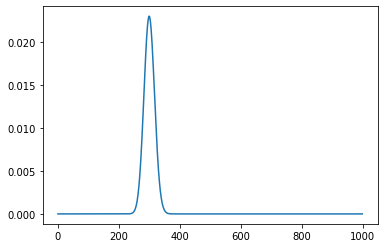

In [80]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

```scipy.stats.norm.rvs(x=value_to_know_the_range_of,loc= mean, scale= std)```

In [87]:
#to obtain the probability between 30 and 35 you calculate the acumulated probs of 35 
#and then subtract the accumulated probs of 30 so you get the one above 30 up to 35

stats.norm.cdf(x=35,loc = 35, scale = 8) - stats.norm.cdf(x=30,loc = 35, scale = 8)

0.23401447095129946

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [91]:
#need to pass the hours to minutes and then know the time per package (/200)
#the probability up to 115 hours to deliver the 200
up_to_115 = stats.norm.cdf(x=115*60/200,loc = 35, scale = 8)

#to obtain the probability it takes for more than 115 hours:

1-up_to_115

0.5249176690292472

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [94]:
1-stats.norm.cdf (x=300, loc = 200, scale = 40)

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [95]:
# calculate the probs up to 160 and substract from the probs up tp 240
stats.norm.cdf (x=240, loc = 200, scale = 40) - stats.norm.cdf (x=160, loc = 200, scale = 40)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [96]:
stats.norm.cdf (x=150, loc = 200, scale = 40)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [97]:
#the probability is probably so close to 0 that could be assumed is 0
1-stats.norm.cdf (x=3000, loc = 200, scale = 40)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [ ]:
#stats.poisson.cdf(k=number_of_occurrences, mu=mean )

In [100]:
# if we wanna find out if there are no robberies in a particular month then k=0
stats.poisson.cdf(k=0, mu=4 )

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [101]:
# if we wanna find out if there is AT LEAST 1 (so one or more) robbery in a particular month
#then we need to substract to 1 the probs of up to 1 robbery per month
1-stats.poisson.cdf(k=1, mu=4)

0.9084218055563291

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [102]:
stats.poisson.cdf(k=6, mu=4) - stats.poisson.cdf(k=2, mu=4)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [104]:
# we need to adapt the mu (average) as it is asking for 15 days and not a month
#we'll have to assume that a month has 30 days

1-stats.poisson.cdf(k=2, mu=4/2)

0.3233235838169366

In [103]:
#stats.poisson.sf()
#Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
stats.poisson.sf(k=2, mu=4/2)

0.32332358381693654